<h1><center>Lesson 4: Design Thinking for User Research</center></h1>

<h1><center>Review Assignment #2</center></h1>

<h1><center>Creating a Bar Chart</center></h1>

In [1]:
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
drinks = ["Cappuccino", "Latte", "Jasmine", "Americano", "Chocolate", "Peppermint"]
sales = [191, 176, 156, 166, 152, 127]
plt.bar(range(len(drinks)),sales)
# Create your ax object here
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(drinks, rotation=30)
plt.show()

/Users/suen/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 640x480 with 1 Axes>

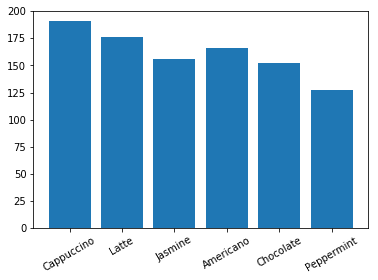

In [11]:
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
drinks = ["Cappuccino", "Latte", "Jasmine", "Americano", "Chocolate", "Peppermint"]
sales = [191, 176, 156, 166, 152, 127]
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(drinks, rotation=30)
plt.bar(drinks,sales)
plt.show()

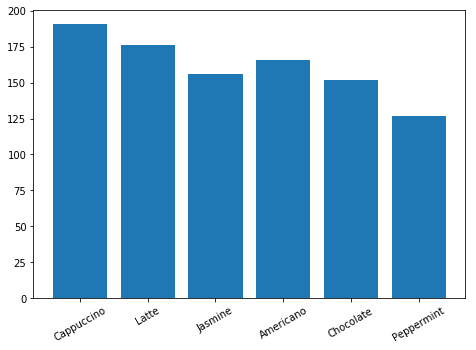

In [35]:
import matplotlib.pyplot as plt
drinks = ["Cappuccino", "Latte", "Jasmine", "Americano", "Chocolate", "Peppermint"]
sales = [191, 176, 156, 166, 152, 127]
ax = plt.figure().add_axes([0,0,1,1])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(drinks, rotation=30)
ax.bar(drinks,sales)
plt.show()

## Using the chinook.db for learning SQL

<a href="https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip" target="_blank">Download Sample Database</a>

## Assignment #2 
<span>
    Create a chart that displays the top 10 genres with the most albums published.
</span>

In [2]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('chinook.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country"  # Select aggregated value and GROUP the result.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count;"
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count DESC;"   
# sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId WHERE genres = 'Jazz';"  
sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Track ID','Track Name','Album Titles','Media Type','Genres'
  ])
# df
######################################################
df.to_csv('track_by_genres.csv',mode='w',index=False)
con = sqlite3.connect('demo1.db')
# write the data to a sqlite table
df = pd.read_csv('track_by_genres.csv')
# Write the data frame to the SQLite 'week_temp' table
df.to_sql('track_by_genres', con, if_exists='replace', index = False) # if_exists='append'
con.close()
df

Entry successfully retrieved.


/Users/suen/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


,Track ID,Track Name,Album Titles,Media Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
5,6,Put The Finger On You,For Those About To Rock We Salute You,MPEG audio file,Rock
6,7,Let's Get It Up,For Those About To Rock We Salute You,MPEG audio file,Rock
7,8,Inject The Venom,For Those About To Rock We Salute You,MPEG audio file,Rock
8,9,Snowballed,For Those About To Rock We Salute You,MPEG audio file,Rock
9,10,Evil Walks,For Those About To Rock We Salute You,MPEG audio file,Rock


In [18]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo1.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country"  # Select aggregated value and GROUP the result.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count;"
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count DESC;"   
sql = "SELECT genres, COUNT(*) AS count FROM track_by_genres GROUP BY genres HAVING COUNT(*) >= 5 ORDER BY count DESC ;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
# df
# df.loc[0:10]
df.to_csv('genres_count.csv',mode='w',index=False)
df = pd.read_csv("genres_count.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe

Entry successfully retrieved.


,Genres,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


<h1><center>Method 1</h1></center>

Entry successfully retrieved.
Genres List: 
 [['Rock', 1297], ['Latin', 579], ['Metal', 374], ['Alternative & Punk', 332], ['Jazz', 130], ['TV Shows', 93], ['Blues', 81], ['Classical', 74], ['Drama', 64], ['R&B/Soul', 61], ['Reggae', 58], ['Pop', 48], ['Soundtrack', 43], ['Alternative', 40], ['Hip Hop/Rap', 35], ['Electronica/Dance', 30], ['Heavy Metal', 28], ['World', 28], ['Sci Fi & Fantasy', 26], ['Easy Listening', 24], ['Comedy', 17], ['Bossa Nova', 15], ['Science Fiction', 13], ['Rock And Roll', 12]]


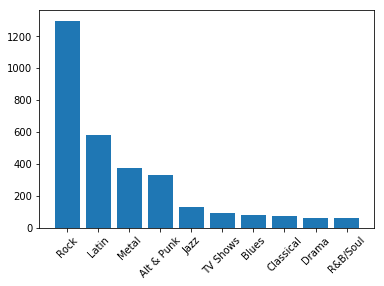

In [13]:
# Genres,Count
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo1.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country"  # Select aggregated value and GROUP the result.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count;"
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count DESC;"   
sql = "SELECT genres, COUNT(*) AS count FROM track_by_genres GROUP BY genres HAVING COUNT(*) >= 5 ORDER BY count DESC ;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
# df
# df.loc[0:10]
df.to_csv('genres_count.csv',mode='w',index=False)
df = pd.read_csv("genres_count.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe
genres_list = df.values.tolist()
print("Genres List:","\n",genres_list)
genres = []
counts = []
max = 0
for i in genres_list:
    if max < 10:
        if i[0] == 'Alternative & Punk':
            genres.append('Alt & Punk')
        else:
            genres.append(i[0])
        counts.append(i[1])
        max = max + 1;
plt.bar(range(len(genres)),counts)
# Create your ax object here
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(genres, rotation=45)
plt.show()

<h1><center>Method 2</h1></center>

Entry successfully retrieved.
Genres List: 
 [['Rock', 1297], ['Latin', 579], ['Metal', 374], ['Alternative & Punk', 332], ['Jazz', 130], ['TV Shows', 93], ['Blues', 81], ['Classical', 74], ['Drama', 64], ['R&B/Soul', 61], ['Reggae', 58]]


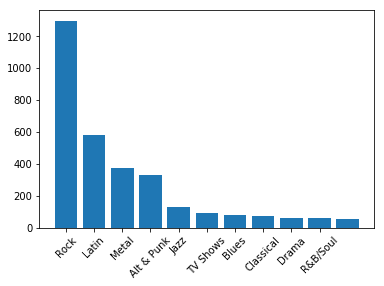

,Genres,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo1.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country"  # Select aggregated value and GROUP the result.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count;"
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count DESC;"   
sql = "SELECT genres, COUNT(*) AS count FROM track_by_genres GROUP BY genres HAVING COUNT(*) >= 5 ORDER BY count DESC ;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
df.to_csv('genres_count.csv',mode='w',index=False)
df = pd.read_csv("genres_count.csv") # import csv file by using the read_csv functon in Pandas
df # list the dataframe
genres_list = df.loc[0:10].values.tolist()
print("Genres List:","\n",genres_list)
genres = []
counts = []
for i in genres_list:
        if i[0] == 'Alternative & Punk':
            genres.append('Alt & Punk')
        else:
            genres.append(i[0])
        counts.append(i[1])
plt.bar(range(len(genres)),counts)
# Create your ax object here
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(genres, rotation=45)
plt.show()
df.loc[0:10]

<h1><center>Method 3</h1></center>

Entry successfully retrieved.
Genres List: 
 [['Rock', 1297], ['Latin', 579], ['Metal', 374], ['Alternative & Punk', 332], ['Jazz', 130], ['TV Shows', 93], ['Blues', 81], ['Classical', 74], ['Drama', 64], ['R&B/Soul', 61], ['Reggae', 58]]


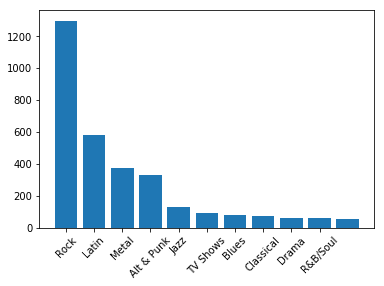

In [26]:
#********************** External Python Module Libraries ************************#
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  


#********************** Key Functions ************************#
def save_genres_count(db,csv_file):
    con = sqlite3.connect(db) # Connection established.
    cursor = con.cursor()            # Built-in cursor function called.
    sql = "SELECT genres, COUNT(*) AS count FROM track_by_genres GROUP BY genres HAVING COUNT(*) >= 5 ORDER BY count DESC ;"  
    try:
        cursor.execute(sql)
        con.commit()
        print("Entry successfully retrieved.")
    except Exception as e:
        print("Exception occurred.",e)
    result = cursor.fetchall()
    con.close()
    df = pd.DataFrame(result, columns=[ 
    'Genres','Count'
      ])
    return df

def read_genres_count(df):
    genres_list = df.loc[0:10].values.tolist()
    print("Genres List:","\n",genres_list)
    return genres_list


def chart_genres_count(genres_list):
    genres = []
    counts = []
    for i in genres_list:
            if i[0] == 'Alternative & Punk':
                genres.append('Alt & Punk')
            else:
                genres.append(i[0])
            counts.append(i[1])
    plt.bar(range(len(genres)),counts)
    # Create your ax object here
    ax = plt.subplot()
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax.set_xticklabels(genres, rotation=45)
    plt.show()
    df.loc[0:10]
    return

#********************** Main Program ************************#
db = 'demo1.db'
csv_file = 'genres_count.csv'
df = save_genres_count(db, csv_file)
genres_list = read_genres_count(df)
chart_genres_count(genres_df)

<h1><center>Essential Roles of a Product Manager (Check PPT PDF)</h1></center>

<h1><center>Without the Joint Tables the Chart Won't Be Possible</center></h1>

<span style="font-size:20px;">
SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres<br> 
FROM tracks<br>
INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId<br>
INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId<br> 
INNER JOIN genres ON genres.GenreId = tracks.GenreId;<br>
</span>


<img src="joint_table.png">

<span style="font-size:24px;">
Thus, it is important that you'll spend the time mastering the three most frequently used relational patterns.
</span>

<center><h1>One-to-One, One-to-Many, Many-to-Many Relationships</h1></center>

<h3><center>
How To Implement One to One, One to Many and Many to Many Relationships When Designing A Database.<br>
Written by: Chukwuemeka Godswill Dan-Chuku in Medium<br>
<a href="https://medium.com/@emekadc/how-to-implement-one-to-one-one-to-many-and-many-to-many-relationships-when-designing-a-database-9da2de684710" target="_blank">Link to Article</a>
</center></h3>

<center><h1>One-to-One</h1></center>

In [32]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
dropsql = "DROP table IF EXISTS Country;"
sql = "CREATE TABLE Country (Pk_Country_Id INTEGER PRIMARY KEY AUTOINCREMENT, Name VARCHAR(100), Officiallang VARCHAR(100), Size INT(11));"
try:  
    cursor.execute(dropsql)
    cursor.execute(sql)
    con.commit()
    print("Entry successfully created.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

Entry successfully created.


In [33]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called. 
dropsql = "DROP table IF EXISTS UNrepresentative;"
sql = "CREATE TABLE UNrepresentative(Pk_UNrepresentative_Id INT PRIMARY KEY, Name VARCHAR(100),Gender VARCHAR(100),Fk_Country_Id INT UNIQUE, FOREIGN KEY (Fk_Country_Id) REFERENCES Country(Pk_Country_Id));"
try:   
    cursor.execute(dropsql)
    cursor.execute(sql)
    con.commit()
    print("Entry successfully created.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

Entry successfully created.


In [34]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql1 = "INSERT INTO Country ('Name','Officiallang','Size') VALUES ('Nigeria','English',923768),('Ghana','English',238535), ('South Africa','English',1219912);"
sql2 = "INSERT INTO UNrepresentative ('Pk_Unrepresentative_Id','Name','Gender','Fk_Country_Id') VALUES (51,'Abubakar Ahmad','Male',1),(52,'Joseph Nkrumah','Male',2), (53,'Lauren Zuma','Female',3);"
try:
    cursor.execute(sql1)
    cursor.execute(sql2)
    con.commit()
    print("Entry successfully inserted.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
# SELECT * FROM Country
# SELECT * FROM UNrepresentative;
cursor.close()
con.close()

Entry successfully inserted.


In [36]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "SELECT * FROM Country"
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
con.close()
print(result)
print('\n')
print(pd.DataFrame(result)) # additional command
print('\n')
df = pd.DataFrame(result, columns=[ 
  'Id','Name','Language','size'
  ])
df

[(1, 'Nigeria', 'English', 923768), (2, 'Ghana', 'English', 238535), (3, 'South Africa', 'English', 1219912)]


   0             1        2        3
0  1       Nigeria  English   923768
1  2         Ghana  English   238535
2  3  South Africa  English  1219912




,Id,Name,Language,size
0,1,Nigeria,English,923768
1,2,Ghana,English,238535
2,3,South Africa,English,1219912


In [37]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "SELECT * FROM UNrepresentative"
cursor.execute(sql)
result = cursor.fetchall()
print(result)
print('\n')
print(pd.DataFrame(result)) # additional command
print('\n')
cursor.close()
con.close()
df = pd.DataFrame(result, columns=[ 
  'Representative ID','Name','Gender','Country Id'
  ])
df

[(51, 'Abubakar Ahmad', 'Male', 1), (52, 'Joseph Nkrumah', 'Male', 2), (53, 'Lauren Zuma', 'Female', 3)]


    0               1       2  3
0  51  Abubakar Ahmad    Male  1
1  52  Joseph Nkrumah    Male  2
2  53     Lauren Zuma  Female  3




,Representative ID,Name,Gender,Country Id
0,51,Abubakar Ahmad,Male,1
1,52,Joseph Nkrumah,Male,2
2,53,Lauren Zuma,Female,3


In [38]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "SELECT UNrepresentative.Pk_UNrepresentative_Id, UNrepresentative.Name, UNrepresentative.Gender, Country.Name FROM UNrepresentative INNER JOIN Country ON UNrepresentative.Fk_Country_Id = Country.Pk_Country_Id;"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Representative Id','Name','Gender', 'Country'
  ])
df

Entry successfully retrieved.


,Representative Id,Name,Gender,Country
0,51,Abubakar Ahmad,Male,Nigeria
1,52,Joseph Nkrumah,Male,Ghana
2,53,Lauren Zuma,Female,South Africa


<center><h1>One-to-Many</h1></center>

In [39]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
nosql = "DROP TABLE IF EXISTS Car"
sql = "CREATE TABLE Car (Pk_Car_Id INTEGER PRIMARY KEY AUTOINCREMENT, Brand VARCHAR(100), Model VARCHAR(100));"
try:   
    cursor.execute(nosql)
    cursor.execute(sql)
    con.commit()
    print("Entry successfully created.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

Entry successfully created.


In [40]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "INSERT INTO Car ('Brand','Model') VALUES ('Benz','GLK350'), ('Toyota','Camry XLE');"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully inserted.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
# SELECT * FROM Country
# SELECT * FROM UNrepresentative;
sql = "SELECT * FROM Car"
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
con.close()
print(result)
print('\n')
print(pd.DataFrame(result)) # additional command
print('\n')
df = pd.DataFrame(result, columns=[ 
  'Id','Brand','Model'
  ])
df


Entry successfully inserted.
[(1, 'Benz', 'GLK350'), (2, 'Toyota', 'Camry XLE')]


   0       1          2
0  1    Benz     GLK350
1  2  Toyota  Camry XLE




,Id,Brand,Model
0,1,Benz,GLK350
1,2,Toyota,Camry XLE


In [41]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
nosql = "DROP TABLE IF EXISTS Engineer"
sql = "CREATE TABLE Engineer (Pk_Engineer_Id INTEGER PRIMARY KEY, FullName VARCHAR(100), MobileNo CHAR(11), Fk_Car_Id INT, FOREIGN KEY (Fk_Car_Id) REFERENCES Car(Pk_Car_Id));"
try:  
    cursor.execute(nosql)
    cursor.execute(sql)
    con.commit()
    print("Entry successfully created.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

Entry successfully created.


In [42]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "INSERT INTO Engineer ('Pk_Engineer_Id','FullName','MobileNo','Fk_Car_Id') VALUES(50,'Elvis Young','08038888888',2),(51,'Bola Johnson','08020000000',1),(52,'Kalu Ikechi','09098888888',1), (53,'Smart Wonodu','08185555555',1), (54,'Umaru Suleja','08056676666',1);"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully inserted.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
# SELECT * FROM Country
# SELECT * FROM UNrepresentative;
sql = "SELECT * FROM Engineer"
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
con.close()
print(result)
print('\n')
print(pd.DataFrame(result)) # additional command
print('\n')
df = pd.DataFrame(result, columns=[ 
  'Id','Full Name','Mobile No','Car Id'
  ])
df


Entry successfully inserted.
[(50, 'Elvis Young', '08038888888', 2), (51, 'Bola Johnson', '08020000000', 1), (52, 'Kalu Ikechi', '09098888888', 1), (53, 'Smart Wonodu', '08185555555', 1), (54, 'Umaru Suleja', '08056676666', 1)]


    0             1            2  3
0  50   Elvis Young  08038888888  2
1  51  Bola Johnson  08020000000  1
2  52   Kalu Ikechi  09098888888  1
3  53  Smart Wonodu  08185555555  1
4  54  Umaru Suleja  08056676666  1




,Id,Full Name,Mobile No,Car Id
0,50,Elvis Young,08038888888,2
1,51,Bola Johnson,08020000000,1
2,52,Kalu Ikechi,09098888888,1
3,53,Smart Wonodu,08185555555,1
4,54,Umaru Suleja,08056676666,1


In [43]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "SELECT Engineer.Pk_Engineer_Id, Engineer.FullName, Engineer.MobileNo, Car.Brand, Car.Model FROM Engineer INNER JOIN Car ON Engineer.Fk_Car_Id = Car.Pk_Car_Id;"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Engineer Id','Full Name','Mobile No', 'Car Brand','Car Model'
  ])
df

Entry successfully retrieved.


,Engineer Id,Full Name,Mobile No,Car Brand,Car Model
0,50,Elvis Young,08038888888,Toyota,Camry XLE
1,51,Bola Johnson,08020000000,Benz,GLK350
2,52,Kalu Ikechi,09098888888,Benz,GLK350
3,53,Smart Wonodu,08185555555,Benz,GLK350
4,54,Umaru Suleja,08056676666,Benz,GLK350


<center><h1>Many-to-Many</h1></center>

In [44]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
nosql ="DROP TABLE IF EXISTS Student"
sql = "CREATE TABLE Student (StudentID INTEGER PRIMARY KEY AUTOINCREMENT, Name VARCHAR (100));"
try: 
    cursor.execute(nosql)
    cursor.execute(sql)
    con.commit()
    print("Entry successfully created.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

Entry successfully created.


In [45]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "INSERT INTO Student ('Name') VALUES ('Olu Alfonso'),('Amarachi Chinda')";

try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully inserted.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
# SELECT * FROM Country
# SELECT * FROM UNrepresentative;
sql = "SELECT * FROM Student"
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
con.close()
print(result)
print('\n')
print(pd.DataFrame(result)) # additional command
print('\n')
df = pd.DataFrame(result, columns=[ 
  'Id','Name'
  ])
df


Entry successfully inserted.
[(1, 'Olu Alfonso'), (2, 'Amarachi Chinda')]


   0                1
0  1      Olu Alfonso
1  2  Amarachi Chinda




,Id,Name
0,1,Olu Alfonso
1,2,Amarachi Chinda


In [46]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
nosql ="DROP TABLE IF EXISTS Class"
sql = "CREATE TABLE Class (ClassID INTEGER PRIMARY KEY AUTOINCREMENT, Course VARCHAR (100));"
try:    
    cursor.execute(sql)
    con.commit()
    print("Entry successfully created.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

Exception occurred. table Class already exists


In [47]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "INSERT INTO Class ('Course') VALUES ('Biology'),('Chemistry'),('Physics'),('English'),('Computer Science'),('History');"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully inserted.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
# SELECT * FROM Country
# SELECT * FROM UNrepresentative;
sql = "SELECT * FROM Class"
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
con.close()
print(result)
print('\n')
print(pd.DataFrame(result)) # additional command
print('\n')
df = pd.DataFrame(result, columns=[ 
  'Id','Course'
  ])
df


Entry successfully inserted.
[(1, 'Biology'), (2, 'Chemistry'), (3, 'Physics'), (4, 'English'), (5, 'Computer Science'), (6, 'History'), (7, 'Biology'), (8, 'Chemistry'), (9, 'Physics'), (10, 'English'), (11, 'Computer Science'), (12, 'History')]


     0                 1
0    1           Biology
1    2         Chemistry
2    3           Physics
3    4           English
4    5  Computer Science
5    6           History
6    7           Biology
7    8         Chemistry
8    9           Physics
9   10           English
10  11  Computer Science
11  12           History




,Id,Course
0,1,Biology
1,2,Chemistry
2,3,Physics
3,4,English
4,5,Computer Science
5,6,History
6,7,Biology
7,8,Chemistry
8,9,Physics
9,10,English


In [51]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
nosql = "DROP TABLE IF EXISTS StudentClassRelation"
sql = "CREATE TABLE StudentClassRelation (StudentId INTEGER NOT NULL, ClassId INTEGER NOT NULL, FOREIGN KEY (StudentID) REFERENCES Student(StudentID), FOREIGN KEY (ClassID) REFERENCES Class(ClassID));"
try: 
    cursor.execute(nosql)
    cursor.execute(sql)
    con.commit()
    print("Entry successfully created.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

Entry successfully created.


In [52]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "INSERT INTO StudentClassRelation ('StudentID','ClassID') VALUES (1,2),(1,4),(1,6),(2,3),(2,1),(2,6);"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully inserted.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
# SELECT * FROM Country
# SELECT * FROM UNrepresentative;
sql = "SELECT * FROM StudentClassRelation"
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
con.close()
print(result)
print('\n')
print(pd.DataFrame(result)) # additional command
print('\n')
df = pd.DataFrame(result, columns=[ 
  'Student Id','Class Id'
  ])
df


Entry successfully inserted.
[(1, 2), (1, 4), (1, 6), (2, 3), (2, 1), (2, 6)]


   0  1
0  1  2
1  1  4
2  1  6
3  2  3
4  2  1
5  2  6




,Student Id,Class Id
0,1,2
1,1,4
2,1,6
3,2,3
4,2,1
5,2,6


In [53]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('demo.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "SELECT Student.StudentID, Student.Name, Class.ClassID, Class.Course FROM Student JOIN StudentClassRelation ON StudentClassRelation.StudentID = Student.StudentId JOIN Class ON Class.ClassID = StudentClassRelation.ClassID;"
# sql = "SELECT Student.StudentID, Student.Name, Class.ClassID, Class.Course FROM Student JOIN StudentClassRelation ON StudentClassRelation.StudentID = Student.StudentId JOIN Class ON Class.ClassID = StudentClassRelation.ClassID WHERE Class.ClassID == 6;"
# sql = "SELECT Class.Course, COUNT(*) FROM Student JOIN StudentClassRelation ON StudentClassRelation.StudentID = Student.StudentId JOIN Class ON Class.ClassID = StudentClassRelation.ClassID GROUP BY Class.ClassID;"


# SELECT contacts.name, schools.school_name, contacts_schools.leave_date, contacts_schools.leave_grade 
# FROM contacts 
# JOIN contacts_schools ON contacts_schools.id = contacts.id 
# JOIN schools ON schools.school_id= contacts_schools.school_id;"

try:    
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Student ID','Student Name','Course ID','Course Name'
# 'Course','# of Enrolled Students'    
  ])
df

Entry successfully retrieved.


,Student ID,Student Name,Course ID,Course Name
0,1,Olu Alfonso,2,Chemistry
1,1,Olu Alfonso,4,English
2,1,Olu Alfonso,6,History
3,2,Amarachi Chinda,3,Physics
4,2,Amarachi Chinda,1,Biology
5,2,Amarachi Chinda,6,History
